In [1]:
import ipywidgets as widgets
from IPython.display import display, Markdown
import math

import plotly.graph_objects as go
import numpy as np



In [2]:
def methode_lumen(surface, eclairement, flux_luminaire, uf, mf):
    """
    Calcul méthode des lumens
    """
    flux_total_requis = surface * eclairement
    nb_luminaires = flux_total_requis / (flux_luminaire * uf * mf)
    
    return {
        "flux_requis": flux_total_requis,
        "nb_luminaires": math.ceil(nb_luminaires)
    }

def afficher_3d_luminaires(nx, ny, hauteur):
    x, y = np.meshgrid(range(nx), range(ny))
    z = np.ones_like(x) * hauteur

    fig = go.Figure(
        data=[
            go.Scatter3d(
                x=x.flatten(),
                y=y.flatten(),
                z=z.flatten(),
                mode='markers',
                marker=dict(size=6)
            )
        ]
    )

    fig.update_layout(
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Hauteur (m)"
        ),
        height=500
    )

    return fig


In [3]:
surface = widgets.FloatText(
    value=50,
    description="Surface (m²)",
    style={"description_width": "160px"}
)

eclairement = widgets.FloatText(
    value=500,
    description="Éclairement (lux)",
    style={"description_width": "160px"}
)

flux_luminaire = widgets.FloatText(
    value=3000,
    description="Flux luminaire (lm)",
    style={"description_width": "160px"}
)

uf = widgets.BoundedFloatText(
    value=0.6,
    min=0.3,
    max=0.9,
    step=0.05,
    description="UF",
    style={"description_width": "160px"}
)

mf = widgets.BoundedFloatText(
    value=0.8,
    min=0.6,
    max=1.0,
    step=0.05,
    description="MF",
    style={"description_width": "160px"}
)


In [4]:
bouton_calcul = widgets.Button(
    description="Calculer",
    button_style="success"
)

output = widgets.Output()



In [5]:
def lancer_calcul(b):
    with output:
        output.clear_output()
        
        resultats = methode_lumen(
            surface.value,
            eclairement.value,
            flux_luminaire.value,
            uf.value,
            mf.value
        )
        
        display(Markdown("### 📊 Résultats"))
        display(Markdown(
            f"""
            - **Flux lumineux requis** : `{resultats['flux_requis']:.0f} lm`  
            - **Nombre de luminaires requis** : **{resultats['nb_luminaires']}**
            """
        ))

bouton_calcul.on_click(lancer_calcul)



## 🧮 Calcul d’éclairage – Méthode des lumens

Output()

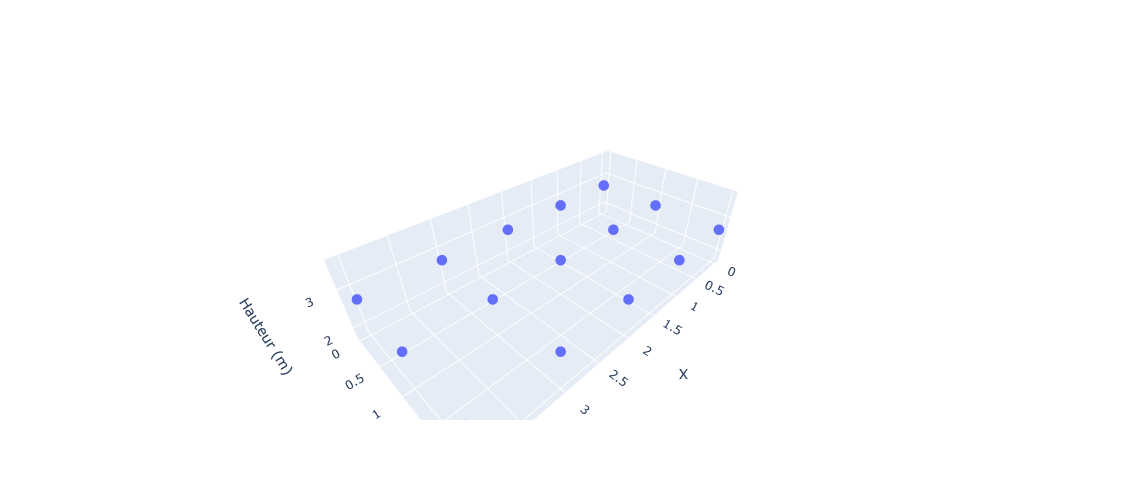

In [6]:
formulaire = widgets.VBox([
    surface,
    eclairement,
    flux_luminaire,
    uf,
    mf,
    bouton_calcul
])

display(Markdown("## 🧮 Calcul d’éclairage – Méthode des lumens"))
display(formulaire, output)

fig = afficher_3d_luminaires(5, 3, 2.7)
fig.show()
